In [3]:
import os.path
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
#Functions that will be used for postprocessing
class apce_data_struct:
    def __init__(self, t, ds_t, icemass, h2omass, numparts):
        self.t = t
        self.ds_t = ds_t
        self.icemass = icemass
        self.h2omass = h2omass
        self.numparts = numparts
    
def read_apcemm_data(directory):
    t_mins = []
    ds_t = []
    ice_mass = []
    total_h2o_mass = []
    num_particles = []

    for file in sorted(os.listdir(directory)):
        if(file.startswith('ts_aerosol') and file.endswith('.nc')):
            file_path = os.path.join(directory,file)
            ds = xr.open_dataset(file_path, engine = "netcdf4", decode_times = False)
            ds_t.append(ds)
            tokens = file_path.split('.')
            mins = int(tokens[-2][-2:])
            hrs = int(tokens[-2][-4:-2])
            t_mins.append(hrs*60 + mins)

            ice_mass.append(ds["Ice Mass"])
            num_particles.append(ds["Number Ice Particles"])
            dx = abs(ds["x"][-1] - ds["x"][0])/len(ds["x"])
            dy = abs(ds["y"][-1] - ds["y"][0])/len(ds["y"])
            
            h2o_mass = np.sum(ds["H2O"]) * 1e6 / 6.022e23 * 0.018 * dx*dy + ds["Ice Mass"]
            total_h2o_mass.append(h2o_mass.values)
            
    return apce_data_struct(t_mins, ds_t, ice_mass, total_h2o_mass, num_particles)

def removeLow(arr, cutoff = 1e-3):
    func = lambda x: (x > cutoff) * x
    vfunc = np.vectorize(func)
    return vfunc(arr)

In [5]:
apce_data = read_apcemm_data('APCEMM_out/')
t = apce_data.t
ds_t = apce_data.ds_t
ice_mass = apce_data.icemass
total_h2o_mass = apce_data.h2omass

In [6]:
ds_t_1h = ds_t[6]

print(ds_t_1h)

# Assume we are splitting the data 47 times over the x values since the x width is divisible by 47

samples = 47

indices = []
values = []
IWCs = []
Eff_rads = []

# Generate the indices and IWC values for the places the domain is split
for i in range(0, samples):
    index = i * int(len(ds_t_1h['x'])/samples)
    indices.append(index)
    values.append(np.float32(ds_t_1h['x'][index].values))

for i in range(0,len(indices)-1):
    IWCs.append(ds_t_1h['IWC'][:, indices[i]:indices[i+1]+1:1])
    Eff_rads.append(ds_t_1h['Effective radius'][:, indices[i]:indices[i+1]+1:1])


<xarray.Dataset>
Dimensions:                      (x: 141, y: 255, r_b: 39, r: 38, t: 1)
Coordinates:
  * x                            (x) float32 -1.673e+03 -1.623e+03 ... 5.327e+03
  * y                            (y) float32 -1.542e+03 -1.536e+03 ... 235.5
  * r                            (r) float32 5.541e-08 6.74e-08 ... 7.798e-05
  * t                            (t) float32 1.0
Dimensions without coordinates: r_b
Data variables: (12/20)
    r_e                          (r_b) float32 ...
    Pressure                     (y) float32 ...
    Altitude                     (y) float32 ...
    H2O                          (y, x) float32 1.402e+15 ... 1.411e+15
    Temperature                  (y, x) float32 ...
    Ice aerosol particle number  (y, x) float32 ...
    ...                           ...
    Extinction                   (y, x) float32 ...
    IWC                          (y, x) float32 ...
    RHi                          (y, x) float32 ...
    width                        (

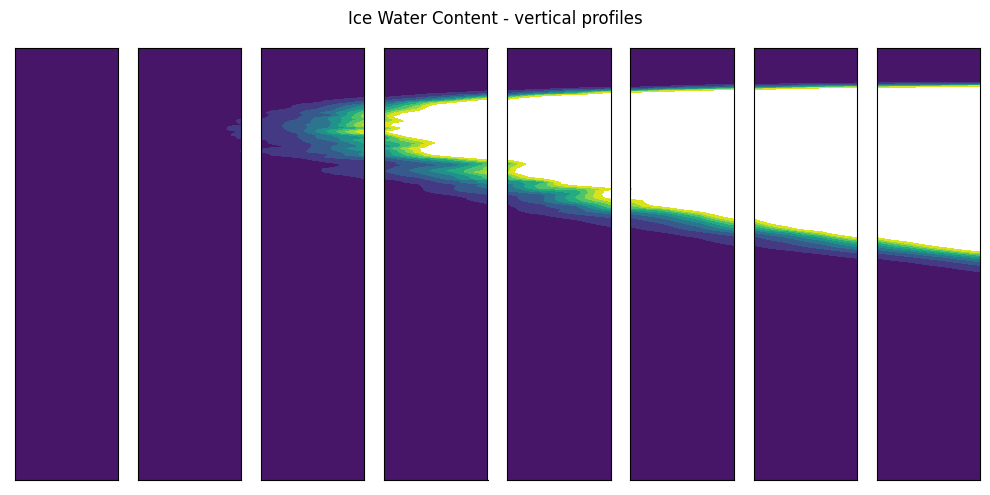

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize = (10,5))
fig.suptitle("Ice Water Content - vertical profiles")

ds_t_1h = ds_t[6]

levels = np.linspace(0, IWCs[2].max(), 10)

X_map1h, Y_map1h = np.meshgrid(ds_t_1h["x"][0:4], ds_t_1h["y"])
map1h = axes[0].contourf(X_map1h, Y_map1h, IWCs[0], levels=levels)

X_map2h, Y_map2h = np.meshgrid(ds_t_1h["x"][3:7], ds_t_1h["y"])
map2h = axes[1].contourf(X_map2h, Y_map2h, IWCs[1], levels=levels)

X_map3h, Y_map3h = np.meshgrid(ds_t_1h["x"][6:10], ds_t_1h["y"])
map3h = axes[2].contourf(X_map3h, Y_map3h, IWCs[2], levels=levels)

X_map4h, Y_map4h = np.meshgrid(ds_t_1h["x"][9:13], ds_t_1h["y"])
map4h = axes[3].contourf(X_map4h, Y_map4h, IWCs[3], levels=levels)

X_map5h, Y_map5h = np.meshgrid(ds_t_1h["x"][12:16], ds_t_1h["y"])
map1h = axes[4].contourf(X_map1h, Y_map1h, IWCs[4], levels=levels)

X_map6h, Y_map6h = np.meshgrid(ds_t_1h["x"][15:19], ds_t_1h["y"])
map2h = axes[5].contourf(X_map2h, Y_map2h, IWCs[5], levels=levels)

X_map7h, Y_map7h = np.meshgrid(ds_t_1h["x"][18:22], ds_t_1h["y"])
map3h = axes[6].contourf(X_map3h, Y_map3h, IWCs[6], levels=levels)

X_map8h, Y_map8h = np.meshgrid(ds_t_1h["x"][21:25], ds_t_1h["y"])
map4h = axes[7].contourf(X_map4h, Y_map4h, IWCs[7], levels=levels)

axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)
axes[4].get_yaxis().set_visible(False)
axes[5].get_yaxis().set_visible(False)
axes[6].get_yaxis().set_visible(False)
axes[7].get_yaxis().set_visible(False)

axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[3].get_xaxis().set_visible(False)
axes[4].get_xaxis().set_visible(False)
axes[5].get_xaxis().set_visible(False)
axes[6].get_xaxis().set_visible(False)
axes[7].get_xaxis().set_visible(False)


plt.tight_layout()
plt.show()

In [8]:
IWCs_temp = IWCs[0].to_numpy()
Eff_rads_temp = Eff_rads[0].to_numpy()

ds_t_1h_x_temp = ds_t_1h["x"][0:4].values
ds_t_1h_y_temp = ds_t_1h["y"].values

IWCs_temp_avg = []
Eff_rads_temp_avg = []

for i in IWCs_temp:
    IWCs_temp_avg.append(i.mean())

for i in Eff_rads_temp:
    Eff_rads_temp_avg.append(i.mean())

(-1400.0, 200.0)

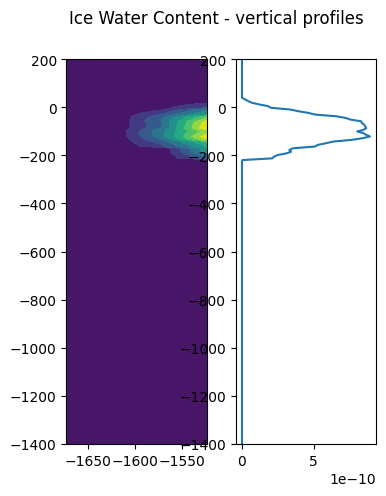

In [9]:
levels = np.linspace(0, IWCs[0].max(), 10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (4,5))
fig.suptitle("Ice Water Content - vertical profiles")

X_map1h, Y_map1h = np.meshgrid(ds_t_1h_x_temp, ds_t_1h["y"])
map1h = axes[0].contourf(X_map1h, Y_map1h, IWCs_temp, levels=levels)
axes[0].set_ylim(-1400,200)

axes[1].plot(IWCs_temp_avg, ds_t_1h_y_temp)
axes[1].set_ylim(-1400,200)

    

In [10]:
base_altitude = 10000
altitude = ds_t_1h_y_temp+base_altitude

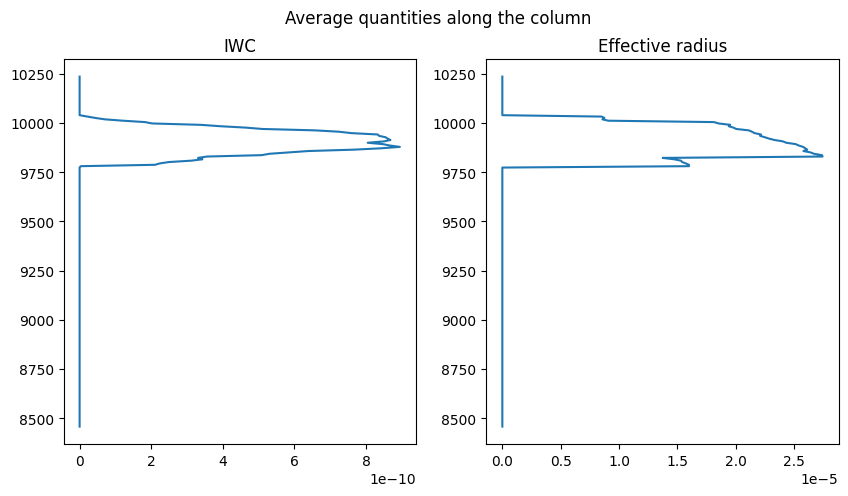

In [11]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

fig.suptitle("Average quantities along the column")

axes[0].plot(IWCs_temp_avg, altitude)
axes[0].set_title("IWC")
axes[1].plot(Eff_rads_temp_avg, altitude)
axes[1].set_title("Effective radius")

fig.show()

In [12]:
IWCs_temp_avg
Eff_rads_temp_avg
altitude

altitude = altitude / 1000
altitude_temp = [0, min(altitude)-1/1000]
altitude = np.concatenate((altitude_temp, altitude))

temp10 = [0,0]
Eff_rads_temp_avg = np.concatenate((temp10, Eff_rads_temp_avg))
IWCs_temp_avg = np.concatenate((temp10, IWCs_temp_avg))*1000

In [13]:
with open("IC.DAT", "w") as f:
    f.write("#      z         IWC          R_eff\n")
    f.write("#     (km)     (g/m^3)         (um)\n")

    for i in range(0,len(altitude)):
        f.write(f"     {altitude[i]:.3f}   {IWCs_temp_avg[i]:.9f}   {Eff_rads_temp_avg[i]:.9f}\n")


In [ ]:
atmosphere_file_path = "../data/atmmod/afglus.dat"
solar_source_path = "../data/solar_flux_atlas_plus_modtran"
ic_file_path = "../examples/IC.DAT"
ic_properties_path = "../examples/IC.001.mie"
day_of_year = 170
albedo = 0.2
sza = 32
number_of_streams = 6

In [22]:
with open("test.INP", "w") as f:
    f.write(f"atmosphere_file {atmosphere_file_path}\n")
    f.write(f"source solar {solar_source_path}\n")
    f.write("mol_modify O3 300. DU\n")
    f.write("\n")
    f.write(f"day_of_year {day_of_year:.0f}\n")
    f.write(f"albedo {albedo:.2f}\n")
    f.write(f"sza {sza:.2f}\n")
    f.write(f"number_of_streams {number_of_streams}\n")
    f.write("\n")
    f.write("rte_solver disort\n")
    f.write("disort_intcor moments\n")
    f.write("mol_abs_param Kato\n")
    f.write("wavelength_index 1 32\n")
    f.write("\n")
    f.write(f"ic_file 1D {ic_file_path}\n")
    f.write(f"ic_properties {ic_properties_path}\n")
    f.write("\n")
    f.write("quiet")